C:\Users\김보경\AppData\Local\conda\conda\envs\venv\lib\site-packages\numpy\_distributor_init.py:32: UserWarning: loaded more than 1 DLL from .libs:
C:\Users\김보경\AppData\Local\conda\conda\envs\venv\lib\site-packages\numpy\.libs\libopenblas.NOIJJG62EMASZI6NYURL6JBKM4EVBGM7.gfortran-win_amd64.dll
C:\Users\김보경\AppData\Local\conda\conda\envs\venv\lib\site-packages\numpy\.libs\libopenblas.PYQHXLVVQ7VESDPUVUADXEVJOBGHJPAY.gfortran-win_amd64.dll
  stacklevel=1)


Epoch 1/30
1563/1563 [==============================] - 24s 15ms/step - loss: 0.5989 - accuracy: 0.8239 - val_loss: 0.1746 - val_accuracy: 0.9489
Epoch 2/30
1563/1563 [==============================] - 25s 16ms/step - loss: 0.1609 - accuracy: 0.9511 - val_loss: 0.1231 - val_accuracy: 0.9637
Epoch 3/30
1563/1563 [==============================] - 25s 16ms/step - loss: 0.1118 - accuracy: 0.9660 - val_loss: 0.1025 - val_accuracy: 0.9693
Epoch 4/30
1563/1563 [==============================] - 25s 16ms/step - loss: 0.0901 - accuracy: 0.9723 - val_loss: 0.0974 - val_accuracy: 0.9705
Epoch 5/30
1563/1563 [==============================] - 25s 16ms/step - loss: 0.0753 - accuracy: 0.9768 - val_loss: 0.0749 - val_accuracy: 0.9787
Epoch 6/30
1563/1563 [==============================] - 25s 16ms/step - loss: 0.0660 - accuracy: 0.9800 - val_loss: 0.0637 - val_accuracy: 0.9806
Epoch 7/30
1563/1563 [==============================] - 25s 16ms/step - loss: 0.0583 - accuracy: 0.9818 - val_loss: 0.0697 -

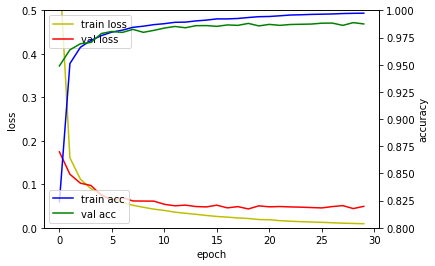

313/313 [==============================] - 1s 4ms/step - loss: 0.0436 - accuracy: 0.9883
## evaluation loss and metrics ##
[0.04361606761813164, 0.9883000254631042]


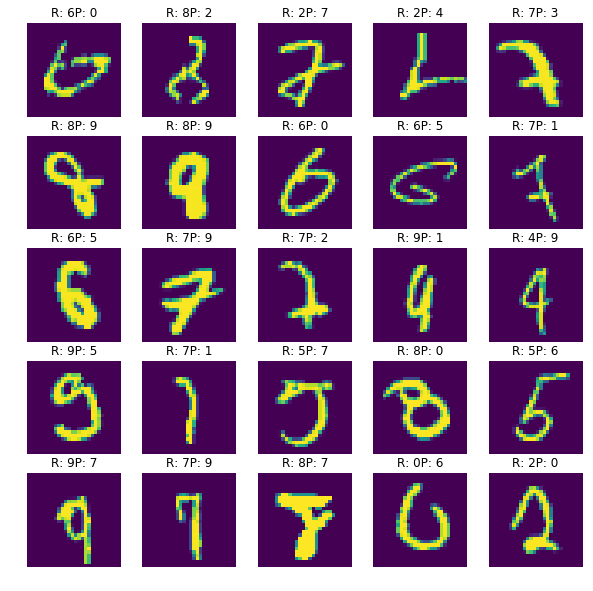

In [1]:
#MNIST 데이터셋에서 손글씨 숫자를 홀수,짝수 분류(이진 분류) 및 숫자 인식(다중 분류)

# 0. 사용할 패키지 불러오기
import numpy as np
from keras.utils import np_utils
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Activation
from keras.layers import Conv2D, MaxPooling2D, Flatten

width = 28
height = 28

#1. 데이터셋 생성하기
#훈련셋과 시험셋 불러오기
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train = x_train.reshape(60000, width, height, 1).astype('float32') / 255.0
x_test = x_test.reshape(10000, width, height, 1).astype('float32') / 255.0

#훈련셋과 검증셋 분리
x_val = x_train[50000:]
y_val = y_train[50000:]
x_train = x_train[:50000]
y_train = y_train[:50000]

#데이터셋 전처리 
y_train = np_utils.to_categorical(y_train)
y_val = np_utils.to_categorical(y_val)
y_test = np_utils.to_categorical(y_test)

#2. CNN 모델 구성하기, 2D 입력에 대한 합성곱 층을 형성(Conv2D)
model = Sequential() #회귀 모델 구성 - 사진에서 물체의 분류나 위치를 추정할 때 적용
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(width, height, 1))) #필터수 32, 3X3 
model.add(MaxPooling2D(pool_size=(2, 2))) #윈도우 크기가 2X2
model.add(Conv2D(32, (3, 3), activation='relu')) 
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(10, activation='softmax'))

#3. 모델 학습과정 설정하기, 다중분류손실함수(categorical_crossentropy) 사용, 최적화함수로 경사하강법(SGD) 사용
model.compile(loss='categorical_crossentropy', optimizer='sgd', metrics=['accuracy']) 

#4. 모델 학습시키기
hist = model.fit(x_train, y_train, epochs=30, batch_size=32, validation_data=(x_val, y_val))

#5. 학습과정 살펴보기
%matplotlib inline
import matplotlib.pyplot as plt

fig, loss_ax = plt.subplots()

accuracy_ax = loss_ax.twinx()

loss_ax.plot(hist.history['loss'], 'y', label='train loss')
loss_ax.plot(hist.history['val_loss'], 'r', label='val loss')
loss_ax.set_ylim([0.0, 0.5])

accuracy_ax.plot(hist.history['accuracy'], 'b', label='train acc')
accuracy_ax.plot(hist.history['val_accuracy'], 'g', label='val acc')
accuracy_ax.set_ylim([0.8, 1.0])

loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss')
accuracy_ax.set_ylabel('accuracy')

loss_ax.legend(loc='upper left')
accuracy_ax.legend(loc='lower left')

plt.show()

#6. 모델 평가하기
loss_and_metrics = model.evaluate(x_test, y_test, batch_size=32)
print('## evaluation loss and metrics ##')
print(loss_and_metrics)

#7. 모델 사용하기, yhat_test => 모델 사용해서 예측한 값
yhat_test = model.predict(x_test, batch_size=32) 

%matplotlib inline
import matplotlib.pyplot as plt

plt_row = 5
plt_col = 5
          
plt.rcParams["figure.figsize"] = (10, 10)

f, axarr = plt.subplots(plt_row, plt_col)
cnt = 0
i = 0

while cnt < (plt_row*plt_col):
    
    if np.argmax(y_test[i]) == np.argmax(yhat_test[i]):
        i += 1
        continue
    
    sub_plt = axarr[cnt//plt_row, cnt%plt_col]
    sub_plt.axis('off')
    sub_plt.imshow(x_test[i].reshape(width, height))
    sub_plt_title = 'R: ' + str(np.argmax(y_test[i])) + 'P: ' + str(np.argmax(yhat_test[i]))
    sub_plt.set_title(sub_plt_title)
    
    i += 1
    cnt += 1
    
plt.show()